# Introduction PyTorch

* machine learning with using `tensor`
* machine leanring with using `tensor`

We will use a polynomial function to approximate the following function:

$$y = \sin(x) \ \ x \in (-\pi, \pi)$$

We will construct a polynominal function:

$$y' = a + bx + cx^2 + dx^3$$

and try to esimate the coefficients $a, b, c, d$ to minimize:

$$L = (y'-y)^2 = [a + bx + cx^2 + dx^3 - \sin(x)]^2$$

The gradient descent gives us


\begin{aligned}
\frac{\partial L}{ \partial a} & = 2 \cdot (y'-y) \cdot \frac{y'}{a} = 2 \cdot (y'-y) \\
\frac{\partial L}{ \partial b} & = 2 \cdot (y'-y) \cdot \frac{y'}{b} = 2 \cdot (y'-y) \cdot x  \\
\frac{\partial L}{ \partial c} & = 2 \cdot (y'-y) \cdot \frac{y'}{c} = 2 \cdot (y'-y) \cdot x^2 \\
\frac{\partial L}{ \partial d} & = 2 \cdot (y'-y) \cdot \frac{y'}{d} = 2 \cdot (y'-y) \cdot x^3
\end{aligned}

The update rule is

$$\theta = \theta - \alpha \frac{L}{\theta}$$

We will set different learning rate and iteration to check the effect of those
parameters. 

A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck. 

![learning-rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

In [48]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import torch
sns.set_theme(context='notebook', style='darkgrid')
from ml_illustration import MlExample
%reload_ext autoreload

## Training a model without GPU

The training time is: 0.703 seconds
Result: y = -0.04238407530278376 + 0.835264355717464 x + 0.007311958263787501 x^2 + -0.09027554573305958 x^3


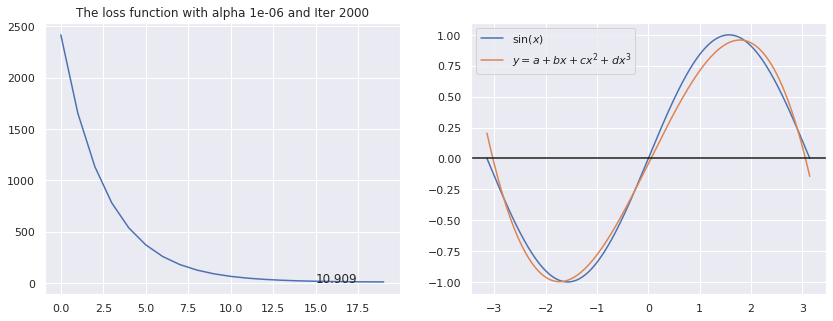

In [49]:
np.random.seed(176)
ml = MlExample()
ml.train_model1(1e-6, 2000)
ml.plot_results()

The training time is: 5.331 seconds
Result: y = 0.8415926490405949 + 0.4466639452857055 x + -0.46400496316159756 x^2 + -0.035000521311288404 x^3 + 0.04487462595592955 x^4


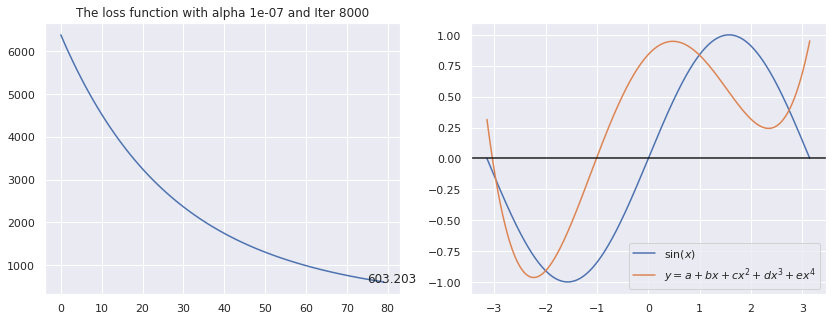

In [29]:
ml.train_model2(1e-7, 8000)
ml.plot_results()

The training time is: 6.658 seconds
Result: y = -0.254343600587253 + 0.6447029304989954 x + 0.13991845859270924 x^2 + -0.06316984241922304 x^3 + -0.01352124229040049 x^4


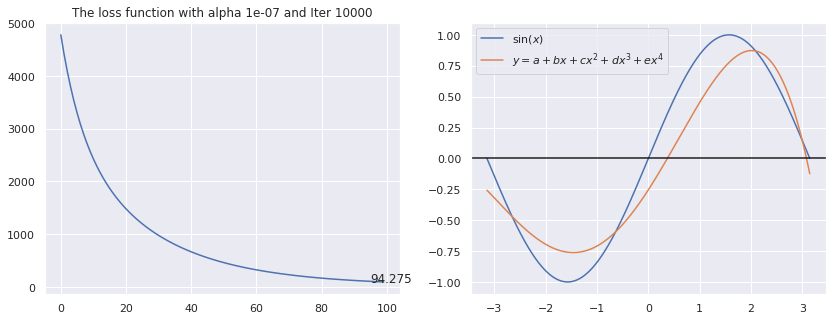

In [30]:
ml.train_model2(1e-7, 10000)
ml.plot_results()

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/root/ESL/ch0/ml_illustration.py:132: RuntimeWarning: overflow encountered in square
  d -= learning_rate * grad_d
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/root/ESL/ch0/ml_illustration.py:150: RuntimeWarning: invalid value encountered in double_scalars
  ax[1].plot(self.x, self.pred, label=r"$y = a+bx+cx^2+dx^3+ex^4$")


The training time is: 4.945 seconds
Result: y = nan + nan x + nan x^2 + nan x^3 + nan x^4 + nan x^5


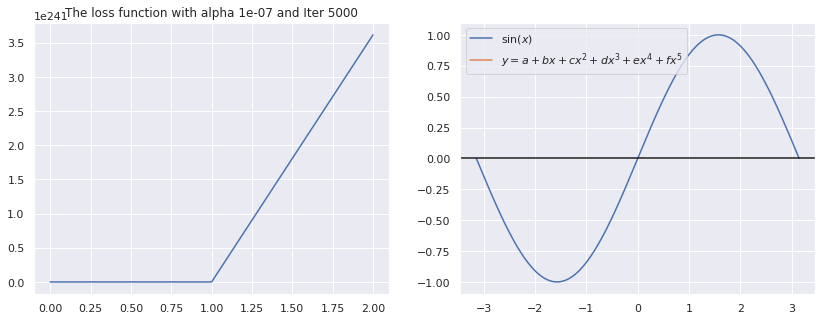

In [31]:
ml.train_model3(1e-7, 5000)
ml.plot_results()

The training time is: 4.891 seconds
Result: y = -0.14033826321325324 + 0.11619704504903053 x + 1.4092617604433244 x^2 + 0.3708400103703527 x^3 + -0.18108901930849855 x^4 + -0.04543122357441472 x^5


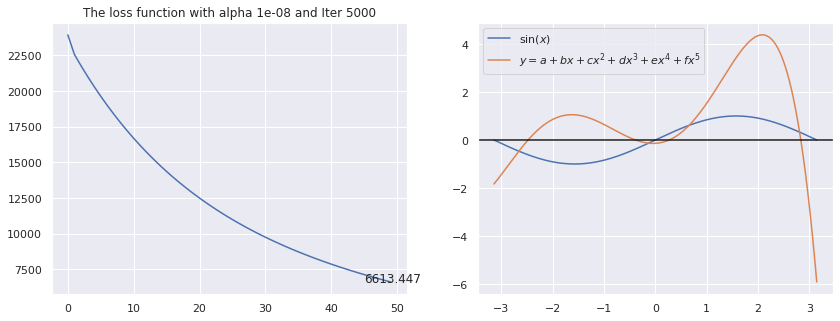

In [32]:
ml.train_model3(1e-8, 5000)
ml.plot_results()

The training time is: 14.494 seconds
Result: y = 0.4636958763544799 + -0.291445435236514 x + 0.33287146183368393 x^2 + 0.330286334804357 x^3 + -0.051987204035833075 x^4 + -0.03383179129311959 x^5


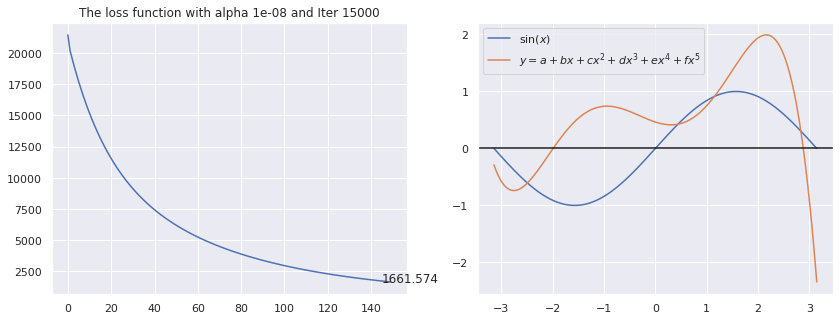

In [33]:
ml.train_model3(1e-8, 15000)
ml.plot_results()

The training time is: 24.291 seconds
Result: y = 1.3795636241577753 + -0.7235818599505985 x + -0.7651169943014673 x^2 + 0.48215888941395935 x^3 + 0.07414719511663267 x^4 + -0.045662330337162924 x^5


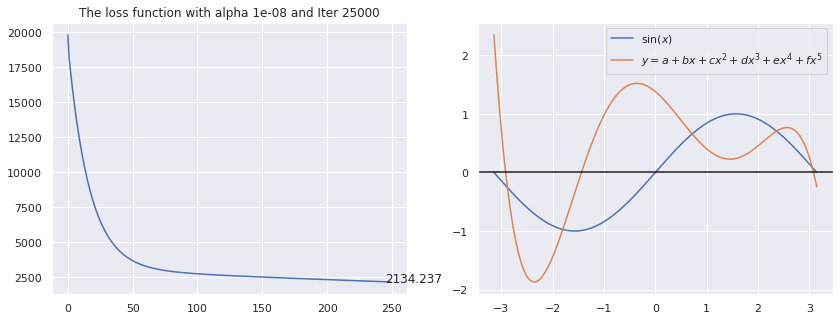

In [46]:
torch.manual_seed(176)
ml.train_model3(1e-8, 25000)
ml.plot_results()

## Training a model with GPU

In [53]:
torch.cuda.is_available()

True

In [56]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
Tesla P100-PCIE-16GB


The training time is: 23.339 seconds
Result: y = 0.7851769328117371 + -0.3908257484436035 x + -0.5074330568313599 x^2 + 0.35863569378852844 x^3 + 0.05158151686191559 x^4 + -0.03573812171816826 x^5


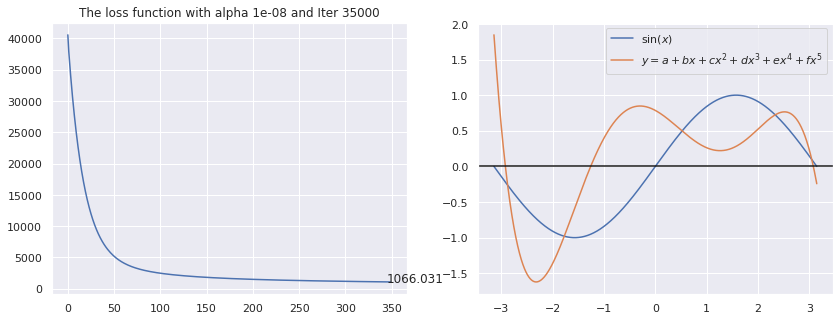

In [52]:
torch.manual_seed(176)
ml.train_with_gpu(1e-8, 35000)
ml.plot_results(gpu=True)


The training time is: 32.685 seconds
Result: y = 0.4878879189491272 + -1.399412989616394 x + -0.24654477834701538 x^2 + 0.7346420288085938 x^3 + 0.023088673129677773 x^4 + -0.06601735204458237 x^5


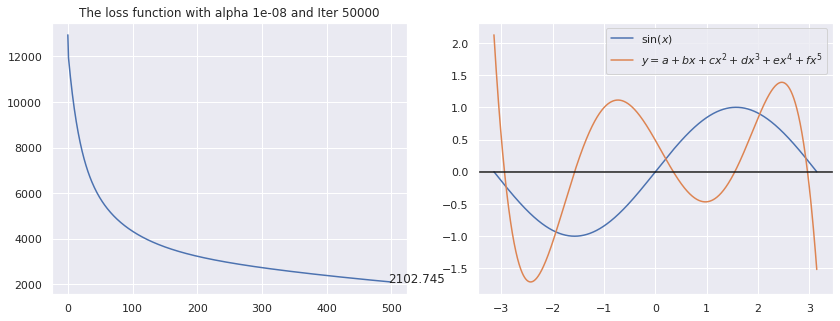

In [57]:
ml.train_with_gpu(1e-8, 50000)
ml.plot_results(gpu=True)

In [58]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
4.06370951900044
GPU (s):
0.051331988999663736
GPU speedup over CPU: 79x


## Take away

* having a good model is very important
* learning rate and intial weights matter a lot
* GPU does speed up the training of a model
* GPU only helps when your model, learning rate and initial weights are 'right' 
* for image models, GPU usually works better